# Exercises with Python

Kamal.chouhbi@emines.um6p.ma

https://pandas.pydata.org/

## Pandas

In [6]:
import pandas as pd
import numpy as np

### Exercise 1

Load this dataset into a DataFrame:

####  https://archive.ics.uci.edu/ml/datasets/Automobile

In [91]:
data = pd.read_csv("cars.txt",na_values='?', header=None)
data.columns = ['Symboling','Normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','drive-wheels','engine-location','length','width','height','curb-weigth','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [1]:
# we check that it is a dataframe
type(data)

NameError: name 'data' is not defined

In [93]:
# we check the typology of the variables
data.dtypes

Symboling              int64
Normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
drive-wheels          object
engine-location      float64
length               float64
width                float64
height               float64
curb-weigth            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [94]:
data.shape

(205, 26)

#### Check if you have missing data and treat them in the way you think is most convenient.


In [95]:
data.isnull().sum()

Symboling             0
Normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
drive-wheels          0
engine-location       0
length                0
width                 0
height                0
curb-weigth           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

* Normalized-losses

Since the 'Normalized-losses' variable is continuous, an option to deal with missing values ​​is the mean of that variable.


In [96]:
x = np.mean(data['Normalized-losses'])

data['Normalized-losses'] = data['Normalized-losses'].fillna(x)

* num-of-doors

In [97]:
data['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [2]:
# move from categorical to numerical variable
categ = {"num-of-doors": {"two": 2, "four": 4}}
data.replace(categ, inplace=True)
         

NameError: name 'data' is not defined

In [99]:
# we check your change
data['num-of-doors'].head(5)

0    2.0
1    2.0
2    2.0
3    4.0
4    4.0
Name: num-of-doors, dtype: float64

In [100]:
# we replace it with the average
x = np.mean(data['num-of-doors'])
x = int(x)
data['num-of-doors'] = data['num-of-doors'].fillna(x)

* Bore / Stroke / horsepower / peak-rpm / price

In [101]:
# bore
x = np.mean(data['bore'])
data['bore'] = data['bore'].fillna(x)

In [102]:
# stroke
x = np.mean(data['stroke'])
data['stroke'] = data['stroke'].fillna(x)

In [103]:
# horsepower
x = np.mean(data['horsepower'])
data['horsepower'] = data['horsepower'].fillna(x)

In [104]:
# peak-rpm
x = np.mean(data['peak-rpm'])
data['peak-rpm'] = data['peak-rpm'].fillna(x)

In [105]:
# price
x = np.mean(data['price'])
data['price'] = data['price'].fillna(x)

A faster way to do is with the for loop:

In [106]:
L = ['Normalized-losses','bore','stroke','horsepower','peak-rpm','price']

for i in L:
    x = np.mean(data[i])
    data[i] = data[i].fillna(x)

We check the missings values:

In [107]:
data.isnull().sum()

Symboling            0
Normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
drive-wheels         0
engine-location      0
length               0
width                0
height               0
curb-weigth          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Get the average length and widths for each category (“body-style”)

In [3]:
# We look at what categories 'body-style' has
data['body-style'].unique()

NameError: name 'data' is not defined

In [109]:
# we index the columns that interest us
data_aux = data.loc[:,['body-style','width','height']]

In [110]:
# we group by body-style category, adding the average of the rest of the columns

bybody_style = data_aux.groupby('body-style')
bybody_style.mean()

,width,height
body-style,,
convertible,65.583333,51.433333
hardtop,66.612500,52.850000
hatchback,65.247143,52.108571
sedan,66.260417,54.337500
wagon,66.256000,56.728000


#### Analyze the weight attribute (“curb-weight”) and draw its histogram to see if it follows any concrete distribution

In [111]:
# to analyze a variable we use the variable describe
data['curb-weigth'].describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb-weigth, dtype: float64

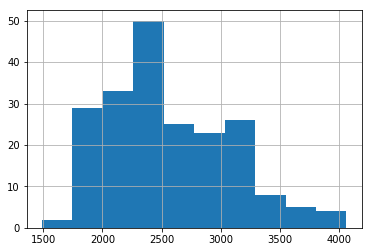

In [112]:
# we draw his histogram
%matplotlib inline
data['curb-weigth'].hist()

#### Analyze the number of cylinders that occur most frequently in the dataset

In [113]:
# variable num-of-cylinders
data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'], dtype=object)

In [4]:
# we make a frequency table
pd.value_counts(data['num-of-cylinders'])

NameError: name 'pd' is not defined

#### Get an ordered list of different car brands.

In [115]:
# variable make
x = data['make'].unique()
x = list(x)
x.sort()
x

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

#### Create a dataframe that only contains the Toyota brand and whose price is greater than the average of its price.

In [5]:
x = data[data.make=='toyota']['price'].mean()
print('Mean Price is:',x)
data1 = data[(data.make=='toyota')&(data.price>x)]

NameError: name 'data' is not defined

In [132]:
data1.head(5)

,Symboling,Normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
169,2,134.0,toyota,gas,std,2.0,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,9989.0
170,2,134.0,toyota,gas,std,2.0,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11199.0
171,2,134.0,toyota,gas,std,2.0,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11549.0
172,2,134.0,toyota,gas,std,2.0,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,17669.0
174,-1,65.0,toyota,diesel,turbo,4.0,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.5,73.0,4500.0,30,33,10698.0


#### What are more expensive gas or diesel cars? Draw a boxplot

In [162]:
data_aux = data.loc[:,['fuel-type','price']]

In [163]:
data_aux.groupby('fuel-type').mean()

,price
fuel-type,
diesel,15838.150000
gas,12922.694689


diesel         AxesSubplot(0.1,0.15;0.363636x0.75)
gas       AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

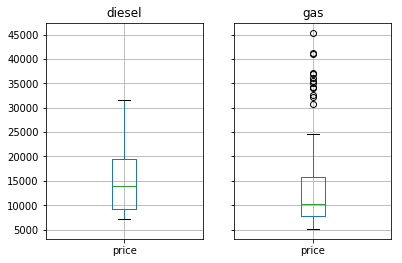

In [164]:
byfueltype = data.groupby("fuel-type")
byfueltype.boxplot(column="price")

#### Remove the symboling column from the dataframe

In [137]:
data = data.drop(labels = 'Symboling', axis = 1)

#### Remove the correlation matrix

In [140]:
correlaciones = data.corr()
correlaciones

,Normalized-losses,num-of-doors,engine-location,length,width,height,curb-weigth,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Normalized-losses,1.000000,-0.362587,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
num-of-doors,-0.362587,1.000000,0.445395,0.392329,0.201970,0.545034,0.195968,0.017992,0.113292,-0.011167,0.159953,-0.123335,-0.240148,-0.021561,-0.045139,0.046545
engine-location,-0.056518,0.445395,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,0.019209,0.392329,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,0.084195,0.201970,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.370706,0.545034,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weigth,0.097785,0.195968,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,0.110997,0.017992,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.029266,0.113292,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,0.054929,-0.011167,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


#### Which variables are more correlated (ordered from highest to lowest) with the price variable?

In [151]:
correlaciones['price'].sort_values(ascending = False)

price                1.000000
engine-size          0.861752
curb-weigth          0.820825
horsepower           0.757917
width                0.728699
length               0.682986
engine-location      0.583168
bore                 0.532300
height               0.134388
Normalized-losses    0.133999
stroke               0.082095
compression-ratio    0.070990
num-of-doors         0.046545
peak-rpm            -0.100854
city-mpg            -0.667449
highway-mpg         -0.690526
Name: price, dtype: float64

#### Create a table grouped by brand and within it grouped by the number of doors whose columns are body-style and horsepower

In [161]:
data_aux = data.loc[:,['body-style','make','num-of-doors','horsepower']]
bymake = data_aux.set_index(["make", "num-of-doors"])
bymake

body-style  horsepower
make        num-of-doors                         
alfa-romero 2.0           convertible       111.0
            2.0           convertible       111.0
            2.0             hatchback       154.0
audi        4.0                 sedan       102.0
            4.0                 sedan       115.0
            2.0                 sedan       110.0
            4.0                 sedan       110.0
            4.0                 wagon       110.0
            4.0                 sedan       140.0
            2.0             hatchback       160.0
bmw         2.0                 sedan       101.0
            4.0                 sedan       101.0
            2.0                 sedan       121.0
            4.0                 sedan       121.0
            4.0                 sedan       121.0
            4.0                 sedan       182.0
            2.0                 sedan       182.0
            4.0                 sedan       182.0
chevrolet   2.0             hatchback        48.0
            2.0             hatchback        70.0
            4.0                 sedan        70.0
dodge       2.0             hatchback        68.0
            2.0             hatchback        68.0
            2.0             hatchback       102.0
            4.0             hatchback        68.0
            4.0                 sedan        68.0
            4.0                 sedan        68.0
            3.0                 sedan       102.0
            4.0                 wagon        88.0
            2.0             hatchback       145.0
...                               ...         ...
toyota      4.0             hatchback        92.0
            4.0                 sedan        92.0
            4.0             hatchback        92.0
            2.0             hatchback       161.0
            2.0             hatchback       161.0
            4.0                 sedan       156.0
            4.0                 wagon       156.0
volkswagen  2.0                 sedan        52.0
            2.0                 sedan        85.0
            4.0                 sedan        52.0
            4.0                 sedan        85.0
            4.0                 sedan        85.0
            4.0                 sedan        68.0
            4.0                 sedan       100.0
            2.0           convertible        90.0
            2.0             hatchback        90.0
            4.0                 sedan       110.0
            4.0                 sedan        68.0
            4.0                 wagon        88.0
volvo       4.0                 sedan       114.0
            4.0                 wagon       114.0
            4.0                 sedan       114.0
            4.0                 wagon       114.0
            4.0                 sedan       162.0
            4.0                 wagon       162.0
            4.0                 sedan       114.0
            4.0                 sedan       160.0
            4.0                 sedan       134.0
            4.0                 sedan       106.0
            4.0                 sedan       114.0

[205 rows x 2 columns]

#### Create a new column being the relationship between 'horsepower' and 'compression-ratio'

In [156]:
data['new variable'] = data['horsepower']/data['compression-ratio']

In [158]:
data['new variable'].head(5)

0    12.333333
1    12.333333
2    17.111111
3    10.200000
4    14.375000
Name: nueva variable, dtype: float64